# **Time Series Analysis and Prediction**
##### By: Muhammad Asim Mubeen



###Importing Dependencies
This is a step that import all the dependecies that is used in the subsequnt pyhton code.

In [ ]:
# Importing Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Loading and Structuring data

Loading the ".csv" data into Panda's structure.Also changing the structure to update the datetype of 'Date' column as datetime and the use 'Date' as my index column. I also am removing the numbered index column.

Note: I am preparing this data to analyze it as time series analysis.



In [ ]:
# Please change the path of data file here below:

Path_fname='/content/DataScientist-TechnicalChallengeData.csv'

df_HR = pd.read_csv (Path_fname, parse_dates=['Date'], index_col='Date')

df_HR = df_HR.drop(df_HR.columns[0],axis = 1)
df_HR.head(5)

,HR_Average,HRV,Durations
Date,,,
2020-03-17,65.58,51.0,5.550000
2020-03-18,65.35,51.0,8.950000
2020-03-19,69.80,43.0,7.033333
2020-03-20,69.76,43.0,7.033333
2020-03-21,70.48,53.0,4.950000


##EXPLORATION

###Discovering Datatypes

Discover the existing datatype of the data. This step is very important to analyze the data properly without unexpected errors.

In [ ]:
df_HR.dtypes

HR_Average    float64
HRV           float64
Durations     float64
dtype: object

###More About Data
It is good to know more about data to get an bird's eye view. That always help while making imortant decisions

In [ ]:
df_HR.shape

(427, 3)

In [ ]:
print(df_HR.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2020-03-17 to 2021-05-17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HR_Average  389 non-null    float64
 1   HRV         389 non-null    float64
 2   Durations   389 non-null    float64
dtypes: float64(3)
memory usage: 13.3 KB
None


###Caution
If you look the results of the previous command, there are 427 total rows. And out of those there are 389 non-null values in HR_Average, HRV, and Durations columns. It means there are 38 null values in each of these columns. Let's check it from a different angle.

In [ ]:
# check the missing values
print ('Total missing values in the dataset', sum(df_HR.isna().sum()))

Total missing values in the dataset 114


In [ ]:
df_HR.describe()

,HR_Average,HRV,Durations
count,389.000000,389.000000,389.000000
mean,74.310463,51.537278,6.701045
std,23.702780,212.795438,4.962141
min,2.500000,0.001000,3.400000
25%,68.690000,31.000000,5.400000
50%,72.780000,41.000000,6.283333
75%,77.650000,51.000000,7.350000
max,517.000000,4230.000000,99.990000


###Caution
Above data describe() function gave us very important insights about the data. There are outliers ... Look at the maximum and minimum values of HR_Average; min = 2.5, max=517 ??????? Really!!!
Similar problem for HRV and Durations. So have to dig more. Let us do it ...

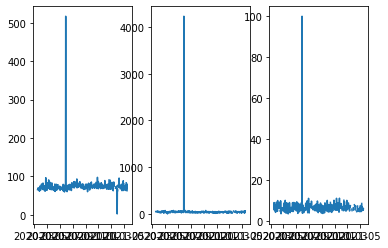

In [ ]:
# Let us start with simply plotting the data
plt.subplot(131)
plt.plot(df_HR.HR_Average)
plt.subplot(132)
plt.plot(df_HR.HRV)
plt.subplot(133)
plt.plot(df_HR.Durations)
plt.show()

### More plots to have a good detailed view of data

In [ ]:
# Preperation for further graphs
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Text(0.5, 0, 'Heart Rate Variability')

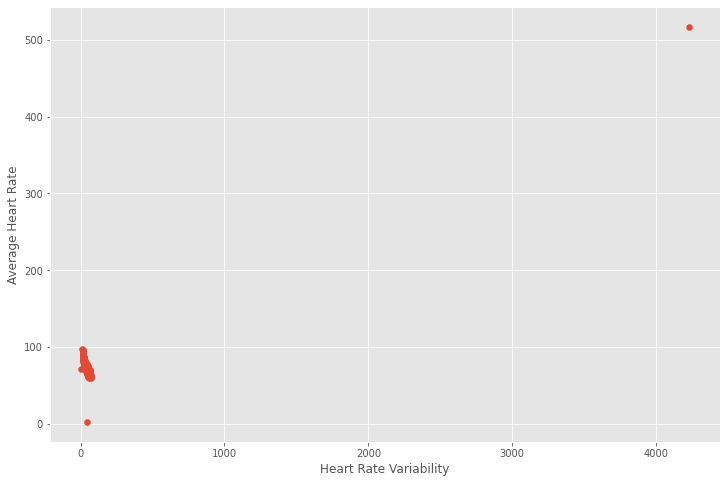

In [ ]:
# It looks like, there are outliers. Plot data differently.

# HR_Average Vs. HRV
plt.scatter(x = df_HR['HRV'], y = df_HR['HR_Average'])
plt.ylabel('Average Heart Rate')
plt.xlabel('Heart Rate Variability')

Text(0.5, 0, 'Sleep Duration')

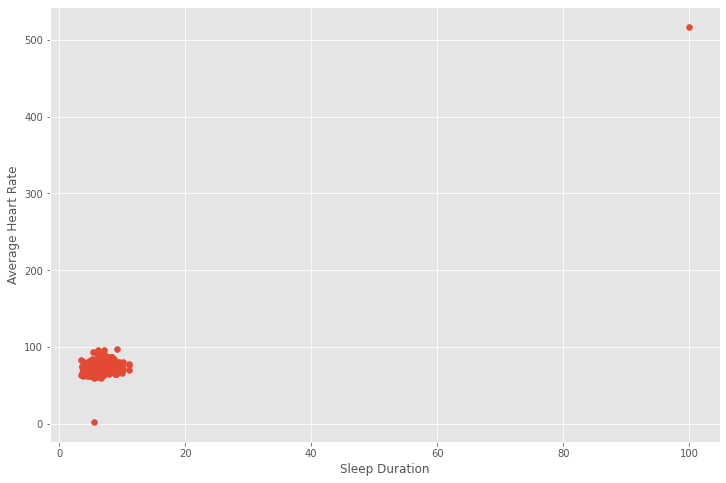

In [ ]:
# HR_Average Vs. Sleeping Duration
plt.scatter( x = df_HR['Durations'], y = df_HR['HR_Average'])
plt.ylabel('Average Heart Rate')
plt.xlabel('Sleep Duration')

In [ ]:
# Remove Heart Rate Variability (HRV) outliers on upper limit
df_HR = df_HR[df_HR['HRV'] != max(df_HR['HRV'])]
df_HR.shape

# Remove Heart Rate Variability outliers on lower limit
df_HR = df_HR[df_HR['HRV'] != min(df_HR['HRV'])]
df_HR.shape

(425, 3)

In [ ]:
# Remove Average Heart Rate outliers on upper limit
df_HR = df_HR[df_HR['HR_Average'] != max(df_HR['HR_Average'])]

# Remove Average Heart Rate outliers on lower limit
df_HR = df_HR[df_HR['HR_Average'] != min(df_HR['HR_Average'])]
df_HR.shape

(423, 3)

Text(0.5, 0, 'Heart Rate Variability')

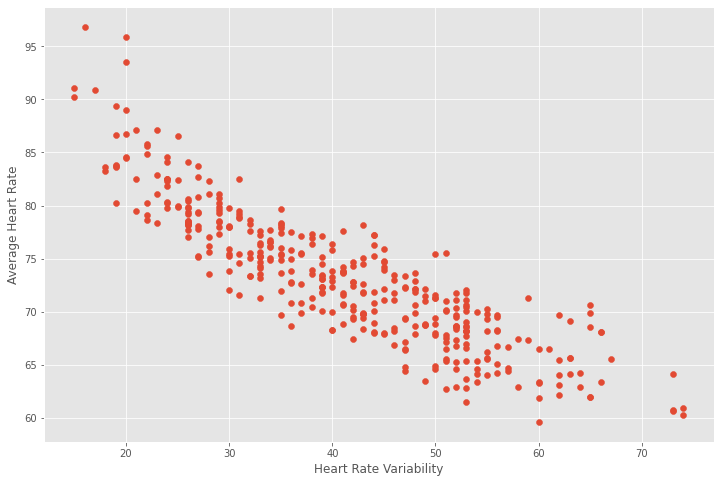

In [ ]:
# Graph again "HRV" vs. HR_Average. Let's see if there are still outliers.
plt.scatter(x = df_HR['HRV'], y = df_HR['HR_Average'])
plt.ylabel('Average Heart Rate')
plt.xlabel('Heart Rate Variability')

Text(0.5, 0, 'Sleep Duration')

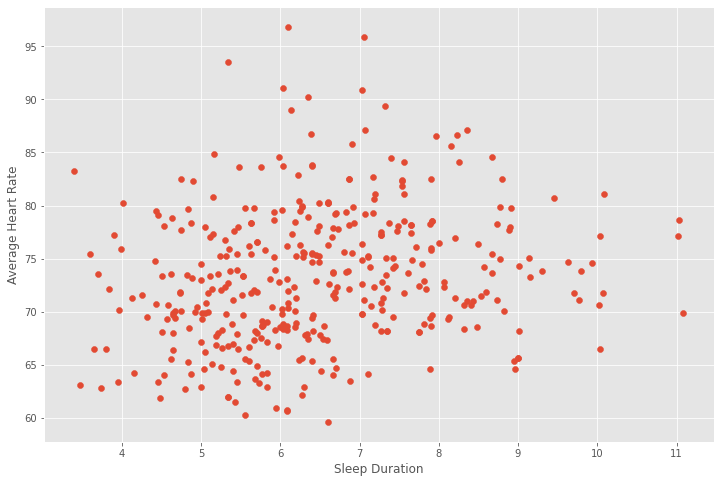

In [ ]:
# Graph again "Durations" Vs. HR_Average.
plt.scatter( x = df_HR['Durations'], y = df_HR['HR_Average'])
plt.ylabel('Average Heart Rate')
plt.xlabel('Sleep Duration')

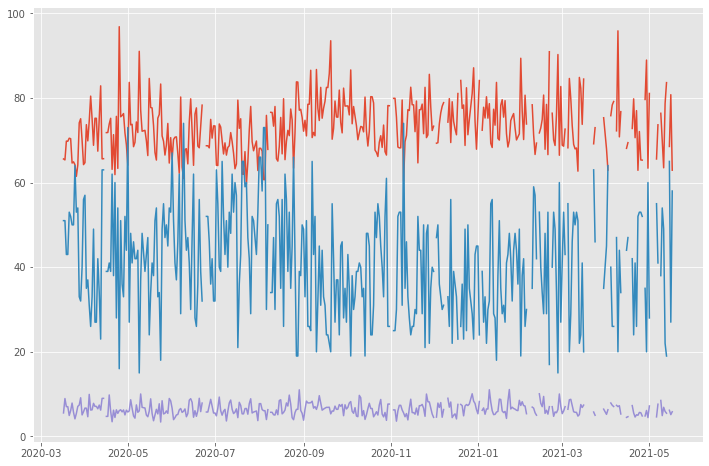

In [ ]:
# Let simply plot the data again
#plt.subplot(131)
plt.plot(df_HR.HR_Average)
#plt.subplot(132)
plt.plot(df_HR.HRV)
#plt.subplot(133)
plt.plot(df_HR.Durations)
plt.show()

In [ ]:
# Look for Null values Again

print(df_HR.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 423 entries, 2020-03-17 to 2021-05-17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HR_Average  385 non-null    float64
 1   HRV         385 non-null    float64
 2   Durations   385 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB
None


Note: It seems there are 38 null rows. It makes 114 null values. Lets check!

In [ ]:
# Total missing values
print ('Total missing values in the dataset', sum(df_HR.isna().sum()))

Total missing values in the dataset 114


### Filling the missing values
The missing values were interpolated using 5 forward values. 

In [ ]:
# Interpolation of missing values

df_HR = df_HR.interpolate(limit=5, limit_direction="forward")

In [ ]:
# Total missing values
print ('Total missing values in the dataset', sum(df_HR.isna().sum()))

Total missing values in the dataset 0


We are done with cleaning and preprocessing the data. LEt us explore it more to apply the appropriate model

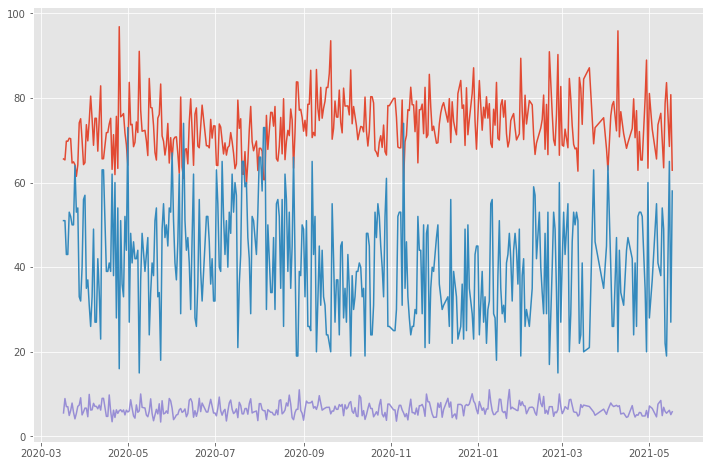

In [ ]:
# Let simply plot the data again
#plt.subplot(131)
plt.plot(df_HR.HR_Average)
#plt.subplot(132)
plt.plot(df_HR.HRV)
#plt.subplot(133)
plt.plot(df_HR.Durations)
plt.show()

## Statistics
Let us explore some basic statistics, correlations and skewness.

In [ ]:
df_HR.describe()

,HR_Average,HRV,Durations
count,423.000000,423.000000,423.000000
mean,73.485284,40.615839,6.463751
std,6.333044,12.479457,1.413736
min,59.610000,15.000000,3.400000
25%,68.905000,31.000000,5.441667
50%,73.120000,41.000000,6.316667
75%,77.645000,50.000000,7.308333
max,96.840000,74.000000,11.083333


Note: There is quite spread out in HRV. 

In [ ]:
# Relationship between the columns to examine the correlations among variables.
numeric_cols = df_HR.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('Correlation values of the Features with Average Heart Rate:'), print (corr['HR_Average'].sort_values(ascending = False), '\n')

Correlation values of the Features with Average Heart Rate:
HR_Average    1.000000
Durations     0.210264
HRV          -0.881244
Name: HR_Average, dtype: float64 



(None, None)

Note: A strong negative correlation of HR_Average with HRV

Higher the average Heart Rate less its variability. Intresting Insight!

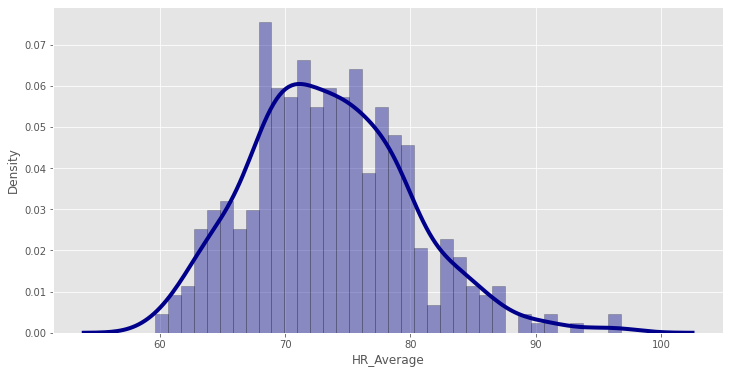

In [ ]:
# Density Plot and Histogram of Variables.

plt.figure(figsize=(12,6))
sns.distplot(df_HR['HR_Average'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

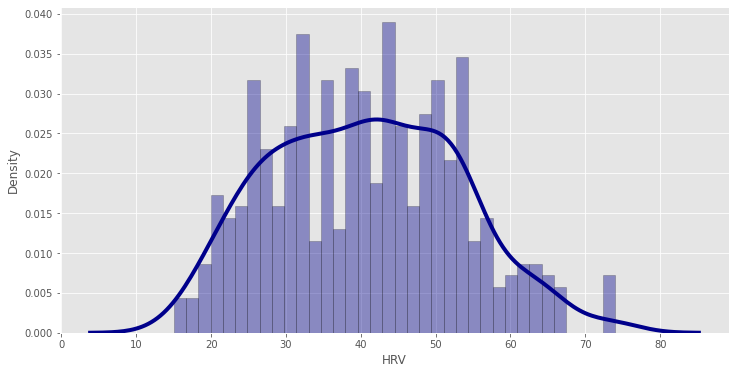

In [ ]:
# Density Plot and Histogram of Variables.

plt.figure(figsize=(12,6))
sns.distplot(df_HR['HRV'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

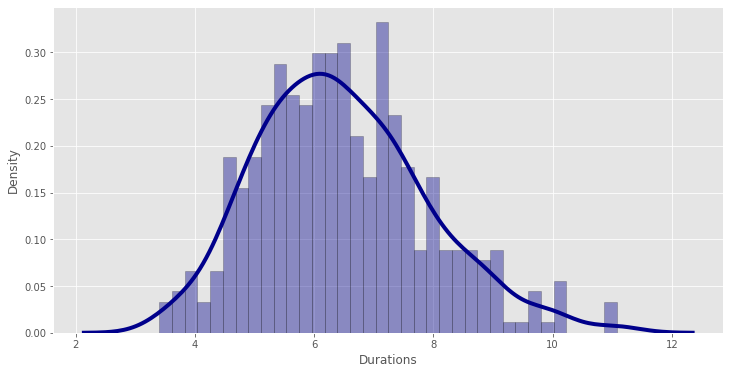

In [ ]:
# Density Plot and Histogram of Variables.

plt.figure(figsize=(12,6))
sns.distplot(df_HR['Durations'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Note: More spread out in HRV is very clear from histogram as well.

### Checking the time series 

In [ ]:
# Checking if series is stationary

for i in range(0,3,1):
  test = adfuller(df_HR[df_HR.columns[i]])

  if test[1] > 0.05:
    print('{} - Series in not stationary'.format(df_HR.columns[i]))
  else:
    print('{} - Series is stationary'.format(df_HR.columns[i]))


HR_Average - Series is stationary
HRV - Series is stationary
Durations - Series is stationary


In [ ]:
# Handling the series that are not stationary
for i in range(0,3,1):
  AF_results = adfuller(df_HR[df_HR.columns[i]].diff()[1:])
  print('{} '.format(df_HR.columns[i]))
  print(AF_results[1])

HR_Average 
5.145527401007121e-13
HRV 
1.1222675744227963e-19
Durations 
3.929768743593234e-14


Note: The data was not stationary but first order differentaiation works good and I will use this in the preprocessing steps of model fitting

In [ ]:
#Let us print the data to look it again

df_HR

,HR_Average,HRV,Durations
Date,,,
2020-03-17,65.580,51.0,5.550000
2020-03-18,65.350,51.0,8.950000
2020-03-19,69.800,43.0,7.033333
2020-03-20,69.760,43.0,7.033333
2020-03-21,70.480,53.0,4.950000
...,...,...,...
2021-05-13,83.620,19.0,5.483333
2021-05-14,76.075,42.0,5.833333
2021-05-15,68.530,65.0,6.183333


# Testing 
I ran my own test to see how well the model works by splitting training data (N-3) rows and test it with the three rows that I left with to mimic the exact same situation that I was facing for the challenge.

I am commenting the code NOT to run for actual analysis. In actual analysis all the rows are used as training data.

In [ ]:
# Getting training and testing data

df_train = df_HR[:len(df_HR)-30]
df_test = df_HR[len(df_HR)-30:]

# Comment following line if want to uncomment above two

#df_train = df_HR

In [ ]:
df_train.shape

(393, 3)

In [ ]:
df_test.shape

(30, 3)

In [ ]:
df_test['HR_Average']

Date
2021-04-18    71.663333
2021-04-19    72.780000
2021-04-20    79.780000
2021-04-21    70.600000
2021-04-22    77.000000
2021-04-23    62.890000
2021-04-24    72.060000
2021-04-25    65.340000
2021-04-26    65.300000
2021-04-27    72.470000
2021-04-28    79.640000
2021-04-29    88.950000
2021-04-30    63.400000
2021-05-01    81.060000
2021-05-02    76.840000
2021-05-03    72.620000
2021-05-04    70.270000
2021-05-05    67.920000
2021-05-06    65.570000
2021-05-07    73.650000
2021-05-08    75.010000
2021-05-09    76.370000
2021-05-10    69.960000
2021-05-11    63.490000
2021-05-12    78.680000
2021-05-13    83.620000
2021-05-14    76.075000
2021-05-15    68.530000
2021-05-16    80.770000
2021-05-17    62.920000
Name: HR_Average, dtype: float64

# Modeling

I choose Vector AutoRegressive (VAR) model to predict the data as time series data. VAR is a multivariate forecasting algorithm that is used when two or more time series influence each other.My pre-analysis suggests that this model can handle the data better as we have multiple time series influencing each other.
###Testing the model
In the next steps I ran a test for Vector AutoRegressive (VAR) model to run the actual model. The reason is to find the best lag value. I also apply first order differentation to tackle the non stationary series.


In [ ]:
# Applying VAR model
model=VAR(df_train.diff()[1:])

In [ ]:
Select_order = model.select_order(maxlags=30)
print(Select_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.091       9.124       8879.       9.104
1        8.632       8.761       5609.       8.683
2        8.438       8.663       4618.       8.527
3        8.322       8.645       4114.       8.450
4        8.188       8.607       3596.       8.354
5        7.991       8.507       2954.       8.196
6        7.875      8.488*       2633.      8.119*
7        7.910       8.619       2726.       8.192
8        7.927       8.733       2772.       8.247
9        7.939       8.842       2808.       8.298
10       7.931       8.930       2785.       8.328
11       7.921       9.017       2758.       8.357
12       7.881       9.074       2652.       8.355
13      7.791*       9.082      2426.*       8.304
14       7.815       9.201       2485.       8.366
15       7.812       9.295       2479.       8.401
16       7.831       9.412     

Note: I ran the above to test our model to find the best lags. I am using the lag as 6. It will run the analysis faster and did well in predicting the test data. 

###Fitting
In the next steps I fit the VAR model on our data. For final analysis, I am using all the available data as test data. Also I am using VARMAX() because it can handle the nonstationary series itself. 

I am going to predict future three values as prediction step later.

In [ ]:
# Fitting the model

VAR_model = VARMAX(df_train, order=(6,0),enforce_stationary = True)
fit_model = VAR_model.fit(disp=False)
print(fit_model.summary())

                                   Statespace Model Results                                   
Dep. Variable:     ['HR_Average', 'HRV', 'Durations']   No. Observations:                  393
Model:                                         VAR(6)   Log Likelihood               -3121.408
                                          + intercept   AIC                           6368.817
Date:                                Thu, 25 Aug 2022   BIC                           6619.167
Time:                                        16:35:49   HQIC                          6468.027
Sample:                                             0                                         
                                                - 393                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.24, 0.08, 0.18   Jarque-Bera (JB):   46.12, 27.86, 7.50
Prob(Q):                  0.62, 0.77, 0.67   Prob(JB):       

#Predictions

In the next steps, I am going to use the model to predict three unknown values

In [ ]:
n_pred = 30

pred = fit_model.get_prediction(start=len(df_train), end=len(df_train)+n_pred-1)

predictions = pred.predicted_mean

In [ ]:
# Self Testing
T = df_test['HR_Average'].to_numpy()
P =predictions['HR_Average'].to_numpy()

MAE = np.sum(np.abs(P-T))/30
RSME = np.mean((P-T)**2)**.5



In [ ]:
# Printing the metrics
print("VAR")
print('RSME:',RSME)
print('MAE: ', MAE)


VAR
RSME: 6.584189147107767
MAE:  5.371493528635668


In [ ]:
# Printing the predictions

predictions.columns = ["HR_Average","HRV", "Duration"]
#predictions.insert(0,'Date',['5/18/2021','5/19/2021','5/20/2021'])
predictions = predictions.reset_index(drop=True)
predictions

,HR_Average,HRV,Duration
0,70.435651,45.610536,6.908525
1,70.909992,43.735402,6.903756
2,71.644667,42.587870,6.556420
3,71.652168,42.924238,6.220744
4,71.974628,43.123546,6.152968
5,71.826582,43.215782,6.279225
6,71.919032,42.701910,6.472595
7,72.227443,42.026631,6.533980
8,72.641347,41.512882,6.521985
9,72.758101,41.543650,6.477171


In [ ]:
# Saving the required Results
#Result = predictions[['Date', 'HR_Average']]

# Please change the following path to save it at desired location
#Path = 'c:/documents/Interview/RNI/'

#Result.to_csv('Results.csv', index=False)

# Conclusions:
I tackle this problem as multivariate time series problem and use a method that seems work good with this dataset. I could see this problem as regression problem, however I have to choose a model that can handle multivariate multiple regression. I think I can try other methods like Vector ARIMA that may improve the accuracy. There are other factors that I wish be available that may help to improve the results. Those can be physical activity duration, blood pressure reading. 
Finally after preprocessing the VAR model fits the data well and did good to predict the test value that I ran as a part of testing it how well it is predicting. 